In [1]:
from IPython.display import SVG, Image

class SVGImage():
    def __init__(self, fname, width=None):
        self.fname = fname
        self.width = width
    def _repr_html_(self):
        if self.width:
            return "<image src='{}' width='{}'/>".format(self.fname, self.width)
        else:
            return "<image src='{}'/>".format(self.fname)
    
image_width = '80%'

# Python on lab bench

Bartosz Teleńczuk 

with contributions of FOSS community

# Prelude

## Science as an art of problem solving

* scientific computing &ne; software engineering (although both can learn from each other)
* **rapid** prototyping
* mixing tools implemented in different labs/different languages/different systems etc.
* each problem is different and needs special method/tools/process

## Tips

* focus on problems rather than tools
* fail early fail often
* test your assumptions
* learn the tools used in your field

* invest 70% of your time in understanding the problem
* no fancy programming technique/stats will trump domain knowledge

## Neural code 1


In [2]:
SVGImage('images/spike_train.svg', width=image_width)

## Neural code 2


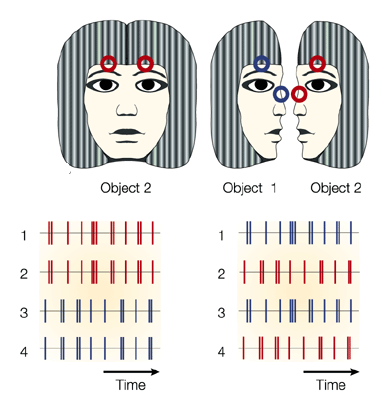

In [3]:
Image('images/nrn1001-704a-i2.png', width=600)



Data from Simmons et al.  *Transformation of Stimulus Correlations by the Retina*.  PLOS Computational Biology, 2013 [10.1371/journal.pcbi.1003344](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003344)

# Project phases


* **Phase 1**: Data exploration
* **Phase 2**: Analysis workflow
* **Phase 3**: Batch processing
* **Phase 4**: Automation



# Phase 1:
# Data exploration

## What is exploratory data analysis (EDA)?

* uses graphical and interactive approach
* focuses on getting insight into the data rather than formal statistical modelling
* relies on our pattern recognition capabilities

> Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone &mdash; as the first step.
>
> &mdash; John W. Tukey in *Exploratory Data Analysis*

## Why EDA?

* checks data sanity
* leads to serendipitous findings
* helps to form new hypotheses
* sets standards for further experiments
* allows to select best tools and procedures

## Tools for EDA


In [4]:
SVGImage('images/logos.svg', width='90%')

## The power of shell (aka command line)

* shell is (yet another) programming language
* specialises on operations with files and executing external tools (incl. Python scripts)

* allows to pass parameters to programs (command-line arguments)
* language agnostic
* powerful editors (vim, emacs)

## Extra resources

JW Tukey, *The future of data analysis*, [online](http://projecteuclid.org/DPubS?service=UI&version=1.0&verb=Display&handle=euclid.aoms/1177704711)

JW Tukey, *Exploratory data analysis*

# Phase 2:
# Data analysis workflow

## What is data analysis workflow?

* Interchangable elements connected by a common interface.
* data-flow oriented (usually represented as a graph)
* data provenance

## Unix philosophy

> Unix philosophy emphasizes building short, simple, clear, modular, and extensible code that can be easily maintained and repurposed by developers other than its creators
>
> &mdash; Wikipedia



* Small is beautiful.
* Make each program do one thing well.
* Build a prototype as soon as possible.
* Store data in flat text files.



## Steps

* database access / query
* data analysis
* visualisation

##  Workflow managers

General purpose:

* command line: drake
* Python-based: jedi, joblib, sumatra
* Web/GUI-based: Taverna, Kepler, VisTrails

Specialised:

* machine learing: modular data processing toolbox (MDP), RapidMiner
* bioinformatics: Galaxy
* 3D visualisation: VTK

## Simple Python-based workflow

```python
import parse_data
import calculate_correlations
import plot_histogram

def main(data_path):
    data = parse_data.main(data_path)

    correlations = calculate_correlations.main(data)

    plot_histogram.main(correlations,
          saveto='correlation_histogram.svg')
                        
if __name__ == '__main__':
    
    data_path = '/location/of/datafile'
    main(data_path)


```

Very good strategy if all components of you workflow are (and future components will be) implemented in Python.

Cons:

* hard to use programs written in other languages (need for wrapper scripts)
* intermediate results are not kept (but it can be added)

## Data management

* keep backups
* never change the raw data
* maintain effective meta-data
* separate processed files from raw data
* separate code from configuration files

## Directory structure

In [5]:
!tree .. -C -L 2 --dirsfirst --noreport -d

..
├── data
├── docs
│   └── images
├── figures
├── libs
│   └── pyNeuro
├── results
├── scripts
└── workflows


## Extra resources

Andrew Davision, *Best practices for data management in neurophysiology*, [online](https://rrcns.readthedocs.org/en/latest/index.html)

Jeroen Janssens, *Data Science at the Command Line*, O'Reilly

V. Cuevas-Vicenttín et al., *Scientific Workflows and Provenance: Introduction and Research Opportunities*, [arXiv](http://arxiv.org/abs/1311.4610v2)

# Phase 3:
# Batch processing

## Batch processing

* run same analysis on a set of data
* usually lets itself to easy parallization (embarassingly parallel)

## Simple Python-based batch processing

```python
import single_analysis
files = ['../data/file1.txt', 
         '../data/file2.txt']

for fname in files:
    single_analysis.main(fname)
```

Cons:
    
* again harder to do with non-python programs
* you need to be sure to keep the module namespace "clean"

# Phase 4:
# Automation

## Who is it good for?

Software engineers:

* compiling computer source code into binary code
* running automated tests
* creating documentation from sources

Scientists:

* running analyses
* producing figures
* compiling source documents (such as $\LaTeX$)

## Dependency tracking

You specify rules and recipes, build tool determines which ones to execute and in what order of execution.

```
Rule 1:
input.txt --> intermediate.txt | script1.py

Rule 2:
intermediate.txt,params.json --> results.txt | script2.py
```

In [6]:
SVGImage('images/dependency_graph.svg', width='90%')

## Automation tools

* build tools: make, cmake, ant
* Python-based build tools: SCons, waf
* general-purpose: doit, rake
* specialised data analysis: drake, luigi

* build tools -- specialising at building software, usually include rules for various programming (and typesetting) languages
* Python-based tools -- specialising at building software, can be extended using Python syntax
* general-purpose -- configurable, usually no (or little) pre-exisiting rules
* specialised data analysis -- often prepared to work with hadoop, access databases etc.

make:

* only single target
* pattern rules very powerful, but might be unpredictable

## Extra resources

Anthony Scopatz & Kathryn Huff, *Effective Computation in Physics*, O'Reilly